In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

In [2]:
domains = ['brand', 'good', 'trait', 'food', 'occupation', 'risk', 'people']
dims = [('sincere','exciting'),
        ('hedonic','utilitarian'),
        ('masculine','feminine'),
        ('tasty','nutritious'),
        ('significance','autonomy'),
        ('dread-inducing','unknowable'),
        ('warm', 'competent')]

dim_names_flattened = [x for dim_pair in dims for x in dim_pair]

# Aggregate-level models

In [3]:
grand_vs_us = pd.DataFrame(columns=['Similarity Correlations', 'Mapping Correlations'], index=dim_names_flattened)

for dim in dim_names_flattened:
    grand_df = pd.read_csv(f'results/grand_method_actual_vs_pred/{dim}.csv')
    our_df   = pd.read_csv(f'results/best_ridge_pred_vs_actual/{dim}.csv')
    
    grand_r, _ = pearsonr(x=grand_df[f'Actual {dim}'], y=grand_df[f'Predicted {dim}'])
    our_r, _   = pearsonr(x=our_df[f'Actual {dim}'],   y=our_df[f'Predicted {dim}'])
    
    grand_vs_us.loc[dim] = [grand_r, our_r]
grand_vs_us

,Similarity Correlations,Mapping Correlations
sincere,0.179958,0.594635
exciting,-0.109321,0.621086
hedonic,0.573439,0.84243
utilitarian,-0.0623082,0.775557
masculine,0.403459,0.73078
feminine,0.31734,0.807277
tasty,0.399699,0.657132
nutritious,0.0329367,0.833428
significance,0.402732,0.817805
autonomy,0.360167,0.821766


In [4]:
pearsonr(grand_vs_us['Similarity Correlations'], grand_vs_us['Mapping Correlations'])

(0.37175391319993306, 0.1906018566710445)

In [5]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
grand_vs_us.loc[grand_vs_us.index[::2],'color']  = colors
grand_vs_us.loc[grand_vs_us.index[1::2],'color'] = colors

In [7]:
lims

[-0.2, 1.0]

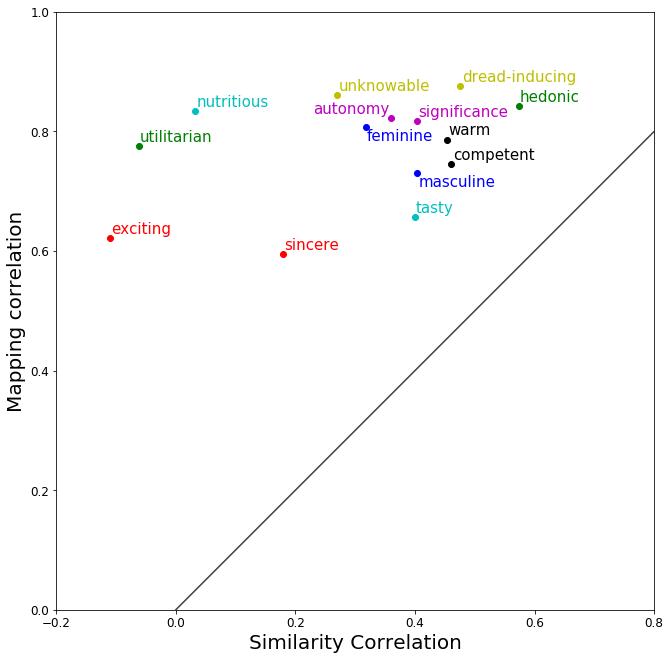

In [8]:
fig, ax = plt.subplots(figsize=(20, 11))

ax.set_xlim(left=-.20, right=.8)
# ax.set_ylim(bottom=0, top=1)

# below is to make y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
# ax.set_xlim(lims)
ax.set_xlim(left=-.2, right=.8)
ax.set_ylim(bottom=0, top=1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ax.set_ylabel('Correlation of actual and predicted judgments, mapping models', fontsize=16)
# ax.set_xlabel('Correlation of actual and predicted judgments, similarity models', fontsize=16)

ax.set_ylabel('Mapping correlation', fontsize=20)
ax.set_xlabel('Similarity Correlation', fontsize=20)

texts = []
for index, dim in grand_vs_us.iterrows():
    ax.scatter(dim[0], dim[1], color=dim[2])
    text = plt.text(x=dim[0], y=dim[1], s=index, ha='center', va='center', color=dim[2], fontsize=15)
    texts.append(text)
    
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
adjust_text(texts)

plt.savefig("figures/mapping_vs_similarity_scatterplot_auto_labeled.png")
plt.show()

In [7]:
# marker  = ['p', '*']
# grand_vs_us['marker'] = marker * 7

In [8]:
# fig, ax = plt.subplots(figsize=(15, 8))
# # fig, ax = plt.subplots()

# for index, dim in grand_vs_us.iterrows():
#     ax.plot(dim[0], dim[1], color=dim[2], marker=dim[3], markersize=10, label=index)
# ax.legend()

# ax.set_xlim(left=-1, right=1)
# ax.set_ylim(bottom=.5, top=1)

# # # below is to make y=x line
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)  

# ax.set_ylabel('Mapping correlations')
# ax.set_xlabel('Similarity correlations')

# plt.savefig("figures/mapping_vs_similarity_scatterplot.png")
# plt.show()

In [9]:
# fig, ax = plt.subplots(figsize=(15, 8))

# for index, dim in grand_vs_us.iterrows():
# #     ax.plot(dim[0], dim[1], color='black', marker='o', markersize=10, label=index)
#     ax.plot(dim[0], dim[1], color=dim[2], marker='o', markersize=10, label=index)
# #     ax.annotate(index, (dim[0], dim[1]), fontsize=12)

# ax.set_xlim(left=-.25, right=1)
# ax.set_ylim(bottom=0, top=1)

# # # below is to make y=x line
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# # ax.set_ylim(lims)
# ax.set_ylim(bottom=0, top=1)

# ax.set_ylabel('Mapping correlations')
# ax.set_xlabel('Similarity correlations')

# plt.savefig("figures/mapping_vs_similarity_scatterplot_no_labels.png")
# plt.show()

# Individual-level models

In [8]:
individual_level_mapping_rs = pd.read_csv('results/individual-level_mapping_model_results.csv')
individual_level_mapping_rs = individual_level_mapping_rs.groupby('Judgment Dimension').mean()
individual_level_mapping_rs.columns = ['pnumb_map', 'Mapping_Corr']
individual_level_mapping_rs

,pnumb_map,Mapping_Corr
Judgment Dimension,,
autonomy,20.5,0.535377
competent,14.0,0.449681
dread-inducing,19.0,0.680572
exciting,16.5,0.374373
feminine,21.5,0.540608
hedonic,22.5,0.617333
masculine,21.5,0.504686
nutritious,7.5,0.651853
significance,20.5,0.582310


In [9]:
individual_level_similarity_rs = pd.read_csv('results/individual-level_similarity_model_results.csv')
individual_level_similarity_rs = individual_level_similarity_rs.groupby('Judgment Dimension').mean()
individual_level_similarity_rs.drop("Unnamed: 0", axis='columns', inplace=True)
individual_level_similarity_rs.columns = ['pnumb_sim', 'Similarity_Corr']
individual_level_similarity_rs

,pnumb_sim,Similarity_Corr
Judgment Dimension,,
autonomy,20.5,0.168782
competent,14.0,0.265339
dread-inducing,19.0,0.342774
exciting,16.5,-0.256598
feminine,21.5,0.131509
hedonic,22.5,0.366078
masculine,21.5,0.224918
nutritious,7.5,-0.030327
significance,20.5,0.217740


In [10]:
all_individual_rs = pd.merge(individual_level_mapping_rs, individual_level_similarity_rs, left_index=True, right_index=True,)
all_individual_rs.drop(['pnumb_map', 'pnumb_sim'], axis='columns', inplace=True)
all_individual_rs = all_individual_rs.loc[dim_names_flattened, ['Similarity_Corr','Mapping_Corr']]
all_individual_rs

,Similarity_Corr,Mapping_Corr
Judgment Dimension,,
sincere,-0.138457,0.300100
exciting,-0.256598,0.374373
hedonic,0.366078,0.617333
utilitarian,-0.213368,0.599271
masculine,0.224918,0.504686
feminine,0.131509,0.540608
tasty,0.169635,0.408924
nutritious,-0.030327,0.651853
significance,0.217740,0.582310


In [11]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
all_individual_rs.loc[all_individual_rs.index[::2],'color']  = colors
all_individual_rs.loc[all_individual_rs.index[1::2],'color'] = colors

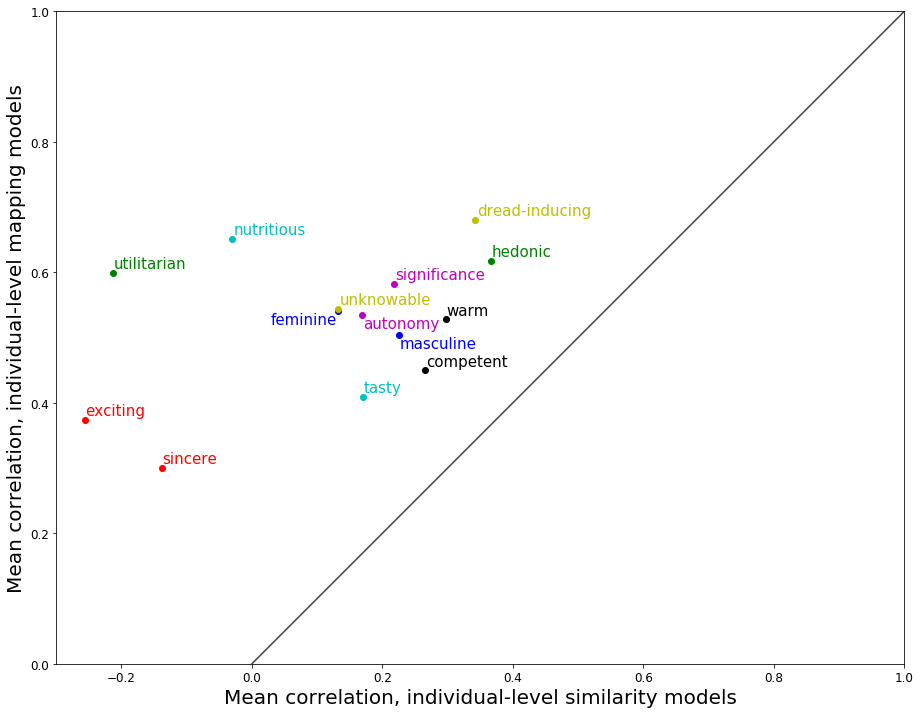

In [12]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.set_xlim(left=-.30, right=1)
# ax.set_ylim(bottom=0, top=1)

# below is to make y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(bottom=0, top=1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ax.set_ylabel('Mean correlation of actual and predicted judgments, individual-level mapping models', fontsize=15)
# ax.set_xlabel('Mean correlation of actual and predicted judgments, individual-level similarity models', fontsize=15)

ax.set_ylabel('Mean correlation, individual-level mapping models', fontsize=20)
ax.set_xlabel('Mean correlation, individual-level similarity models', fontsize=20)

texts = []
for index, dim in all_individual_rs.iterrows():
    ax.scatter(dim[0], dim[1], color=dim[2])
    text = plt.text(x=dim[0], y=dim[1], s=index, ha='center', va='center', color=dim[2], fontsize=15)
    texts.append(text)
    
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
adjust_text(texts)

plt.savefig("figures/individual_level_mapping_vs_similarity_scatterplot_auto_labeled.png")
plt.show()